In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_datasets as tfds

In [2]:
# tfds.load returns a tf.data.Dataset object and a tf.core.DatasetInfo object. The latter contains info about how the set is split 
# into test and train, number of examples and names of features
dataset, metadata = tfds.load('cifar10', as_supervised=True, with_info=True) 
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
# Size of training and test sets
train_size = metadata.splits['train'].num_examples
test_size = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(train_size))
print("Number of test examples:     {}".format(test_size))
# Normalise data
def minmaxScaling(images, labels):
    images = tf.cast(images, tf.float32)
    images = images/255
    return images, labels

train_dataset = train_dataset.map(minmaxScaling)
test_dataset = test_dataset.map(minmaxScaling)

Number of training examples: 50000
Number of test examples:     10000


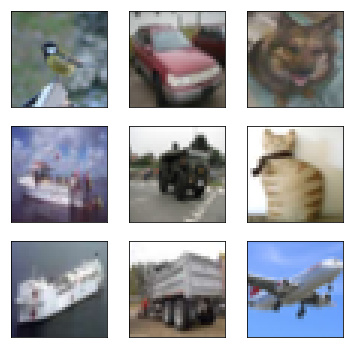

In [4]:
# Human readable labels for the classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
               'horse', 'ship', 'truck']
# Print example 
plt.figure(figsize=(6,6))
i = 0
for (image, label) in test_dataset.take(9):
    image = image.numpy().reshape((32,32,3))
    plt.subplot(3,3,i+1)
    plt.imshow(image)#, cmap= plt.cm.binary)
    plt.xlabel(class_names[label], color='white')
    plt.xticks([])
    plt.yticks([])
    i += 1
plt.show()

In [5]:
# Model setup
# One dense layer with 128 neurons, output layer with 10 neurons. Poor performance (~.40). 
#Adding more hidden layers does not improve the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=([32,32,3])),
    tf.keras.layers.Dense(units=256, input_shape=([3072]), activation=('relu')),
    tf.keras.layers.Dense(units=128, activation=('relu')),
    tf.keras.layers.Dense(units=10, activation=('softmax'))
])
# Compile model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = 'adam',
              metrics=['accuracy'])

In [6]:
# Shuffling and splitting of training set 
BATCH_SIZE = 64
train_dataset = train_dataset.repeat().shuffle(train_size).batch(BATCH_SIZE)
test_dataset_batched = test_dataset.batch(BATCH_SIZE)

In [7]:
# Training model
model.fit(train_dataset, epochs=15, verbose=True, steps_per_epoch=np.ceil(train_size/BATCH_SIZE))

Epoch 1/15
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


782/782 [==============================] - 39s 50ms/step - loss: 1.8777 - accuracy: 0.3255
Epoch 2/15
782/782 [==============================] - 31s 39ms/step - loss: 1.6800 - accuracy: 0.3993
Epoch 3/15
782/782 [==============================] - 27s 34ms/step - loss: 1.6018 - accuracy: 0.4283
Epoch 4/15
782/782 [==============================] - 28s 35ms/step - loss: 1.5341 - accuracy: 0.4542
Epoch 5/15
782/782 [==============================] - 28s 35ms/step - loss: 1.4968 - accuracy: 0.4671
Epoch 6/15
782/782 [==============================] - 26s 33ms/step - loss: 1.4620 - accuracy: 0.4744
Epoch 7/15
782/782 [==============================] - 26s 33ms/step - loss: 1.4517 - accuracy: 0.4817
Epoch 8/15
782/782 [==============================] - 30s 38ms/step - loss: 1.4205 - accuracy: 0.4937
Epoch 9/15
782/782 [==============================] - 31s 40ms/step - loss: 1.4079 - accuracy: 0.4967
Epoch 10/15
782/782 [==============================] - 28s 35ms/step - loss: 1.3800 - accurac

In [8]:
# Predictions
test_loss, test_acc = model.evaluate(test_dataset_batched, steps=np.ceil(test_size/BATCH_SIZE))
predictions = model.predict(test_dataset_batched)

157/157 [==============================] - 4s 29ms/step - loss: 1.4298 - accuracy: 0.4979


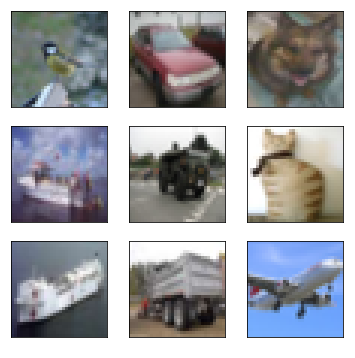

In [9]:
# Print example and its predicted class
plt.figure(figsize=(6,6))
i = 0
for (image, label) in test_dataset.take(9):
    image = image.numpy().reshape((32,32,3))
    plt.subplot(3,3,i+1)
    plt.imshow(image, cmap= plt.cm.binary)
    plt.xlabel((class_names[label], class_names[predictions[i].argmax()]), color='white')#
    plt.xticks([])
    plt.yticks([])
    i += 1
plt.show()

In [10]:
print(predictions)

[[2.7515326e-02 1.0472790e-02 1.6044901e-01 ... 8.9619299e-03
  2.9445399e-02 1.4321902e-02]
 [1.0053365e-03 6.8544909e-02 1.0325313e-03 ... 5.0677652e-03
  6.1234307e-02 8.4676200e-01]
 [5.3611058e-03 1.3567363e-03 9.7391531e-02 ... 1.8222783e-02
  5.8248141e-03 1.4189070e-02]
 ...
 [4.6222001e-02 6.2967765e-01 8.9540787e-02 ... 7.2273806e-02
  1.0414685e-01 1.5097202e-02]
 [3.9442457e-02 5.7592499e-04 2.5727218e-01 ... 2.8071925e-02
  2.5376601e-03 1.5751980e-03]
 [5.2893197e-04 5.4145359e-02 5.4609487e-03 ... 4.2196787e-03
  4.8488835e-03 9.2784482e-01]]
